In [1]:
import pandas as pd

# Step 1: Data Preparation
# Load your dataset into a variable 'data'
data = pd.read_csv('/content/sample_data/Pre-Registration Summary for Moudud.csv')  # Replace 'your_dataset.csv' with the actual path to your dataset

# Extract relevant date features from the "Date" column
data['Date'] = pd.to_datetime(data['Date'])  # Convert "Date" to datetime type
data


,Date,Day Total,Month Total
0,2016-03-23,356,90434
1,2016-03-24,7921,90434
2,2016-03-27,24640,90434
3,2016-03-28,53740,90434
4,2016-03-29,2123,90434
...,...,...,...
1764,2023-09-13,243,3654
1765,2023-09-14,322,3654
1766,2023-09-17,338,3654
1767,2023-09-18,344,3654


In [2]:
# Delete the first 347 rows
data = data.iloc[347:]

# Reset the index after deleting rows
data.reset_index(drop=True, inplace=True)
data


,Date,Day Total,Month Total
0,2018-01-02,937,17664
1,2018-01-03,856,17664
2,2018-01-04,756,17664
3,2018-01-06,13,17664
4,2018-01-07,793,17664
...,...,...,...
1417,2023-09-13,243,3654
1418,2023-09-14,322,3654
1419,2023-09-17,338,3654
1420,2023-09-18,344,3654


In [3]:
# Define the cutoff date
cutoff_date = pd.to_datetime('5/31/2023')

# Filter the DataFrame to keep rows only before the cutoff date
data = data[data['Date'] <= cutoff_date]

# If you want to reset the index
data.reset_index(drop=True, inplace=True)
data

,Date,Day Total,Month Total
0,2018-01-02,937,17664
1,2018-01-03,856,17664
2,2018-01-04,756,17664
3,2018-01-06,13,17664
4,2018-01-07,793,17664
...,...,...,...
1338,2023-05-25,115,3423
1339,2023-05-28,148,3423
1340,2023-05-29,117,3423
1341,2023-05-30,100,3423


In [4]:
data['Year'] = data['Date'].dt.year
data


<ipython-input-4-a844fbdf328b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Year'] = data['Date'].dt.year


,Date,Day Total,Month Total,Year
0,2018-01-02,937,17664,2018
1,2018-01-03,856,17664,2018
2,2018-01-04,756,17664,2018
3,2018-01-06,13,17664,2018
4,2018-01-07,793,17664,2018
...,...,...,...,...
1338,2023-05-25,115,3423,2023
1339,2023-05-28,148,3423,2023
1340,2023-05-29,117,3423,2023
1341,2023-05-30,100,3423,2023


In [5]:
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day
data

<ipython-input-5-d2d9ab6cd24d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Month'] = data['Date'].dt.month
<ipython-input-5-d2d9ab6cd24d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Day'] = data['Date'].dt.day


,Date,Day Total,Month Total,Year,Month,Day
0,2018-01-02,937,17664,2018,1,2
1,2018-01-03,856,17664,2018,1,3
2,2018-01-04,756,17664,2018,1,4
3,2018-01-06,13,17664,2018,1,6
4,2018-01-07,793,17664,2018,1,7
...,...,...,...,...,...,...
1338,2023-05-25,115,3423,2023,5,25
1339,2023-05-28,148,3423,2023,5,28
1340,2023-05-29,117,3423,2023,5,29
1341,2023-05-30,100,3423,2023,5,30


In [6]:
# Step 2: Data Splitting
X = data[['Year', 'Month', 'Day']]  # Features
y = data['Month Total']  # Target variable

In [7]:
X

,Year,Month,Day
0,2018,1,2
1,2018,1,3
2,2018,1,4
3,2018,1,6
4,2018,1,7
...,...,...,...
1338,2023,5,25
1339,2023,5,28
1340,2023,5,29
1341,2023,5,30


In [8]:
y

0       17664
1       17664
2       17664
3       17664
4       17664
        ...  
1338     3423
1339     3423
1340     3423
1341     3423
1342     3423
Name: Month Total, Length: 1343, dtype: int64

In [9]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Random Forest Model Training
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train, y_train)

# Step 4: Evaluation
y_train_pred = rf_regressor.predict(X_train)
y_test_pred = rf_regressor.predict(X_test)

# Calculate evaluation metrics for regression on training data
mse_train = mean_squared_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

# Calculate evaluation metrics for regression on test data
mse_test = mean_squared_error(y_test, y_test_pred)
r2_test = r2_score(y_test, y_test_pred)

print("Training Mean Squared Error:", mse_train)
print("Training R-squared:", r2_train)
print("Test Mean Squared Error:", mse_test)
print("Test R-squared:", r2_test)

# Compare training and test performance
if mse_train < mse_test:
    print("The model is not overfitting.")
else:
    print("The model may be overfitting. Further analysis is needed.")


Training Mean Squared Error: 14241.39634515829
Training R-squared: 0.9995846272067831
Test Mean Squared Error: 54989.56033271375
Test R-squared: 0.9983934961661756
The model is not overfitting.


In [10]:
y_test_pred = rf_regressor.predict(X_test)

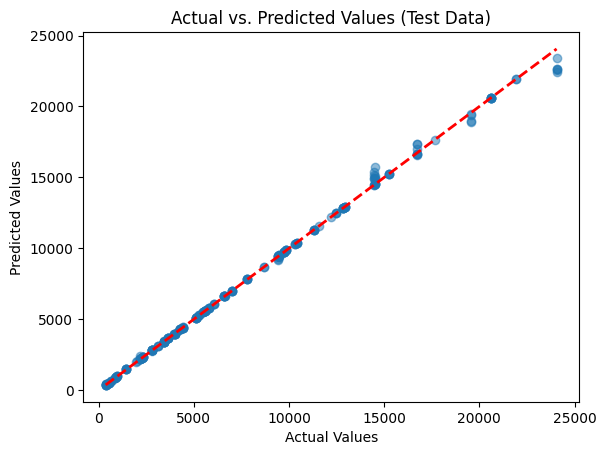

In [11]:
import matplotlib.pyplot as plt

# Scatter plot for actual vs. predicted values on the test data
plt.scatter(y_test, y_test_pred, alpha=0.5)  # alpha is for transparency
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values (Test Data)")

# Add a diagonal line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], linestyle='--', color='red', linewidth=2)

plt.show()


In [12]:
import pandas as pd

# Create a DataFrame to display actual and predicted values
results = pd.DataFrame({'Actual': y_test, 'Predicted': y_test_pred})

# Print the DataFrame
print(results)


      Actual  Predicted
824      639      639.0
549      527      527.0
365     5587     5587.0
422     5101     5101.0
904     3994     3994.0
...      ...        ...
109     6089     6089.0
390     5286     5286.0
1205    9852     9852.0
807      852      852.0
548     6612     6612.0

[269 rows x 2 columns]


In [13]:

single_date = {'Year': [2023], 'Month': [6], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = rf_regressor.predict(x_test_single)
y_test_pred

array([4018.7])

In [14]:
single_date = {'Year': [2023], 'Month': [7], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = rf_regressor.predict(x_test_single)
y_test_pred

array([3635.2])

In [15]:
single_date = {'Year': [2023], 'Month': [8], 'Day': [3]}
x_test_single = pd.DataFrame(single_date)
y_test_pred = rf_regressor.predict(x_test_single)
y_test_pred

array([20627.])